In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# rOT

In [2]:
model0 = Doc2Vec.load('rOT/doc2vec.0.model')
model1 = Doc2Vec.load('rOT/doc2vec.1.model')


In [3]:
labels = pd.read_csv('labels.csv').to_numpy()
classes = np.unique(labels)
# colors = {'24hrs meloxicam':'r', '24hrs saline':'g', '4hrs carrageenan':'b', 'baseline':'c', 'baseline meloxicam':'k'}
# colors = ['r','g','b','c','k']
# labelMap = pd.factorize(labels)[0].tolist()
colors = {'24hrs meloxicam':"#58d68d", '24hrs saline':"#f7dc6f", '4hrs carrageenan':"#e59866", 'baseline':"#5d6d7e", 'baseline meloxicam':"#d2b4de"}


meloxicam24h = mpatches.Patch(color="#58d68d", label='24hrs meloxicam')
saline24h = mpatches.Patch(color="#f7dc6f", label='24hrs saline')
carrageenan = mpatches.Patch(color="#e59866", label='4hrs carrageenan')
baseline = mpatches.Patch(color="#5d6d7e", label='baseline')
baselineMeloxicam =  mpatches.Patch(color="#d2b4de", label='baseline meloxicam')

In [4]:

def reduce_dimensions(model,perplexity):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.dv.vectors)
    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions,perplexity=perplexity, random_state=0)
    vectors = tsne.fit_transform(vectors)
    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals


def plot_with_matplotlib(x_vals, y_vals, labels, axis, perplexity):
    import random

    random.seed(0)
    c = []
    for label in labels:
        if label[0] in colors:
            c.append(colors[label[0]])
            
    axis.scatter(x_vals, y_vals, c=c)
    axis.set_title("Perplexity=%d" % perplexity)

In [5]:

def reduce_dimensions_3D(model,perplexity):
    num_dimensions = 3  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions,perplexity=perplexity, random_state=0)
    vectors = tsne.fit_transform(vectors)
    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    z_vals = [v[2] for v in vectors]
    return x_vals, y_vals, z_vals


def plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, axis, perplexity):
    import random

    random.seed(0)
    c = []
    for label in labels:
        if label[0] in colors:
            c.append(colors[label[0]])

    axis.scatter(x_vals, y_vals, z_vals,c=c)
    axis.set_title("Perplexity=%d" % perplexity, color="white")

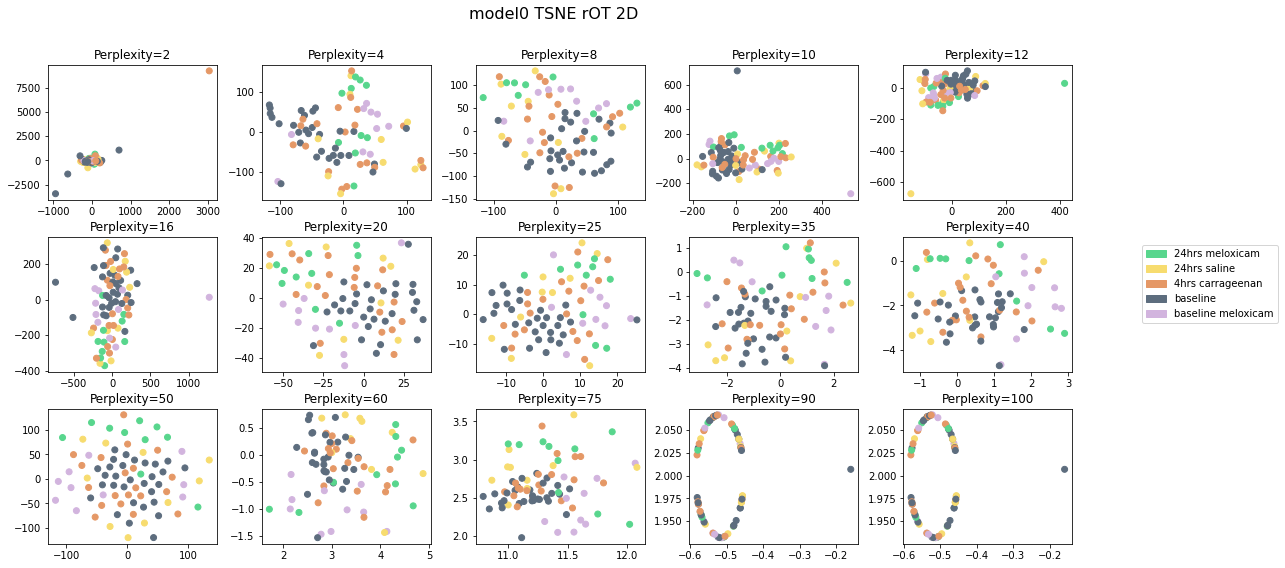

In [6]:
## Model 0
(fig, subplots) = plt.subplots(3,5, figsize = (15,8))
fig.tight_layout(h_pad=2)
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for ax, perplexity in zip((fig.axes),perplexities):
    x_vals, y_vals = reduce_dimensions(model0, perplexity)
    plot_with_matplotlib(x_vals, y_vals, labels, ax, perplexity)

title = fig.suptitle('model0 TSNE rOT 2D', size='16')
fig.subplots_adjust(top=0.88)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('model0_TSNE_rOT_2D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')

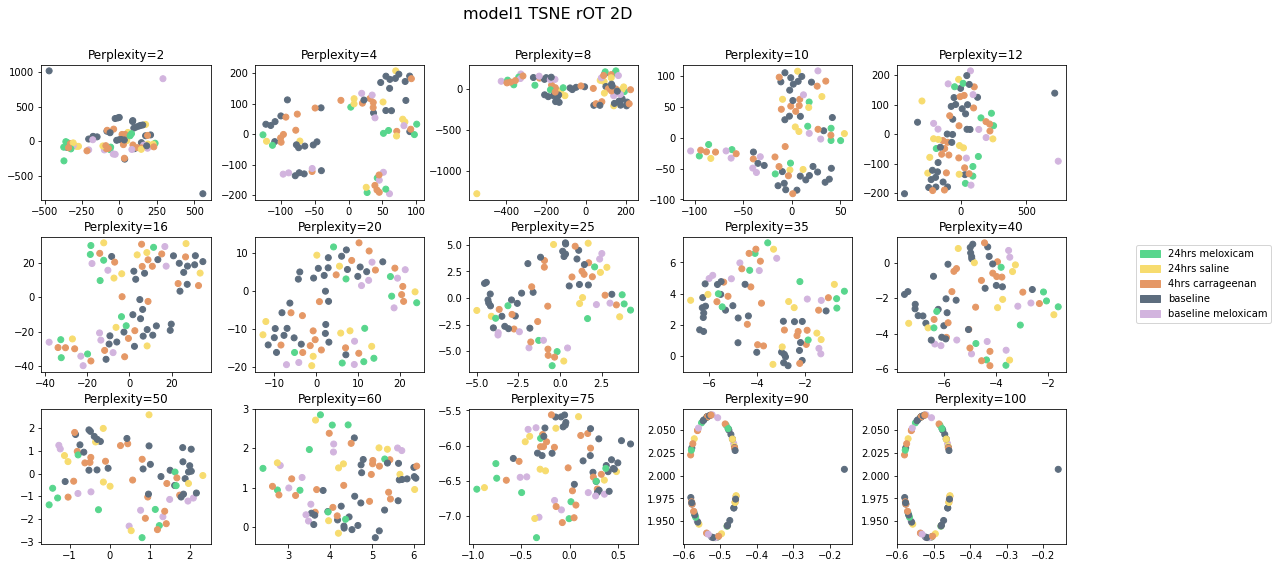

In [7]:
## Model 1
(fig, subplots) = plt.subplots(3,5, figsize = (15,8))
fig.tight_layout(h_pad=2)
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for ax, perplexity in zip(fig.axes,perplexities):
    x_vals, y_vals = reduce_dimensions(model1, perplexity)
    plot_with_matplotlib(x_vals, y_vals, labels, ax, perplexity)

title = fig.suptitle('model1 TSNE rOT 2D', size='16')
fig.subplots_adjust(top=0.88)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('model1_TSNE_rOT_2D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')

In [8]:
# ## Model 0
# fig = plt.figure(figsize=(40,24))
# perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
# len(perplexities)

# for i, perplexity in enumerate(perplexities):
#     ax = fig.add_subplot(3, 5, i+1, projection='3d')
#     x_vals, y_vals, z_vals = reduce_dimensions_3D(model0, perplexity)
#     plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, ax, perplexity)

# plt.title('model0 PCA rOT 3D')
# fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam])
# plt.savefig('model0_PCA_rOT_3D.png')

In [9]:
# ## Model 1
# fig = plt.figure(figsize=(40,24))
# perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
# len(perplexities)

# for i, perplexity in enumerate(perplexities):
#     ax = fig.add_subplot(3, 5, i+1, projection='3d')
#     x_vals, y_vals, z_vals = reduce_dimensions_3D(model1, perplexity)
#     plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, ax, perplexity)

# rST

In [10]:
model0 = Doc2Vec.load('rST/doc2vec.0.model')
model1 = Doc2Vec.load('rST/doc2vec.1.model')

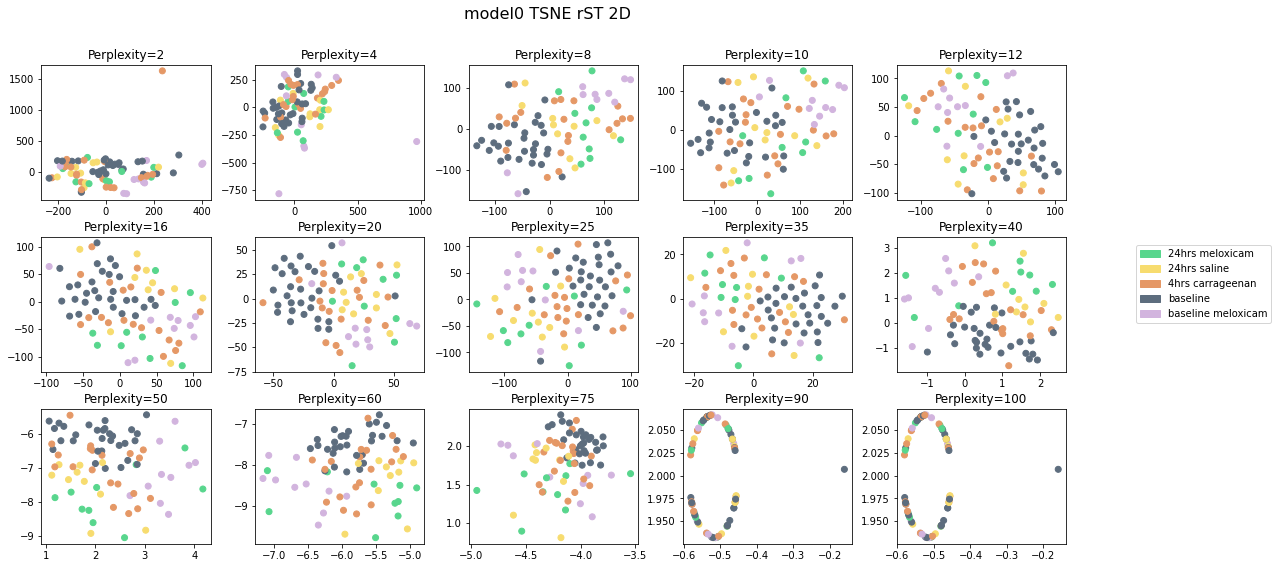

In [11]:
## Model 0
(fig, subplots) = plt.subplots(3,5, figsize = (15,8))
fig.tight_layout(h_pad=2)
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for ax, perplexity in zip(fig.axes,perplexities):
    x_vals, y_vals = reduce_dimensions(model0, perplexity)
    plot_with_matplotlib(x_vals, y_vals, labels, ax, perplexity)

title = fig.suptitle('model0 TSNE rST 2D', size='16')
fig.subplots_adjust(top=0.88)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('model0_TSNE_rST_2D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')

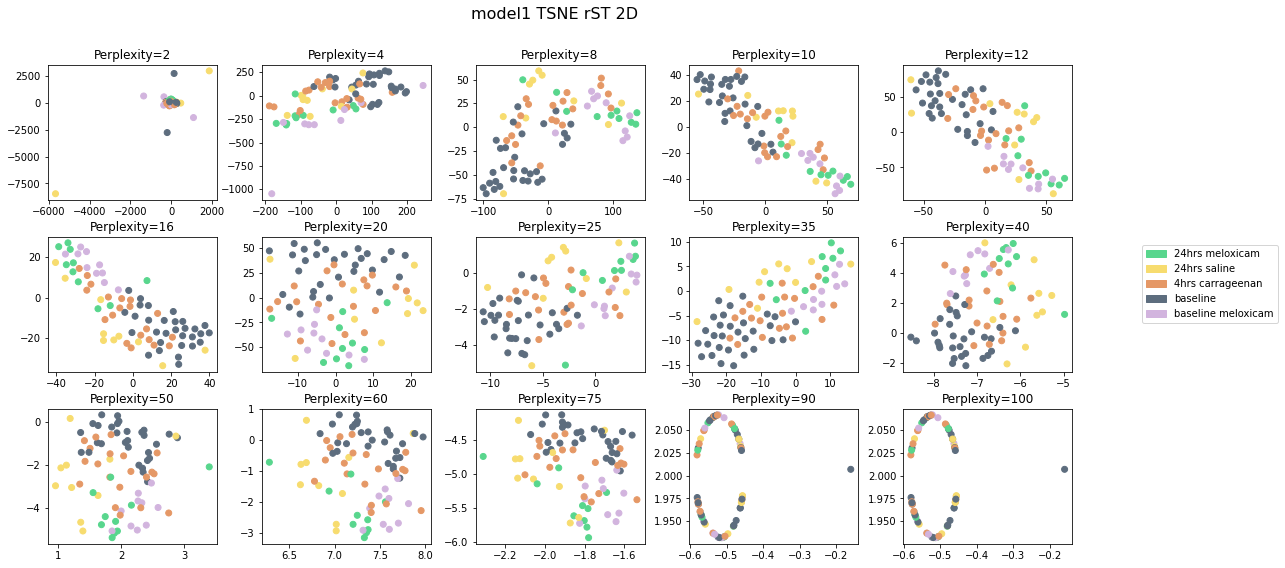

In [12]:
## Model 1
(fig, subplots) = plt.subplots(3,5, figsize = (15,8))
fig.tight_layout(h_pad=2)
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for ax, perplexity in zip(fig.axes,perplexities):
    x_vals, y_vals = reduce_dimensions(model1, perplexity)
    plot_with_matplotlib(x_vals, y_vals, labels, ax, perplexity)

title = fig.suptitle('model1 TSNE rST 2D', size='16')
fig.subplots_adjust(top=0.88)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('model1_TSNE_rST_2D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')


In [13]:
# ## Model 0
# fig = plt.figure(figsize=(40,24))
# perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
# len(perplexities)

# for i, perplexity in enumerate(perplexities):
#     ax = fig.add_subplot(3, 5, i+1, projection='3d')
#     x_vals, y_vals, z_vals = reduce_dimensions_3D(model0, perplexity)
#     plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, ax, perplexity)

In [14]:
# ## Model 1
# fig = plt.figure(figsize=(40,24))
# perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
# len(perplexities)

# for i, perplexity in enumerate(perplexities):
#     ax = fig.add_subplot(3, 5, i+1, projection='3d')
#     x_vals, y_vals, z_vals = reduce_dimensions_3D(model1, perplexity)
#     plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, ax, perplexity)

# gOT

In [15]:
model0 = Doc2Vec.load('gOT/doc2vec.0.model')
model1 = Doc2Vec.load('gOT/doc2vec.1.model')

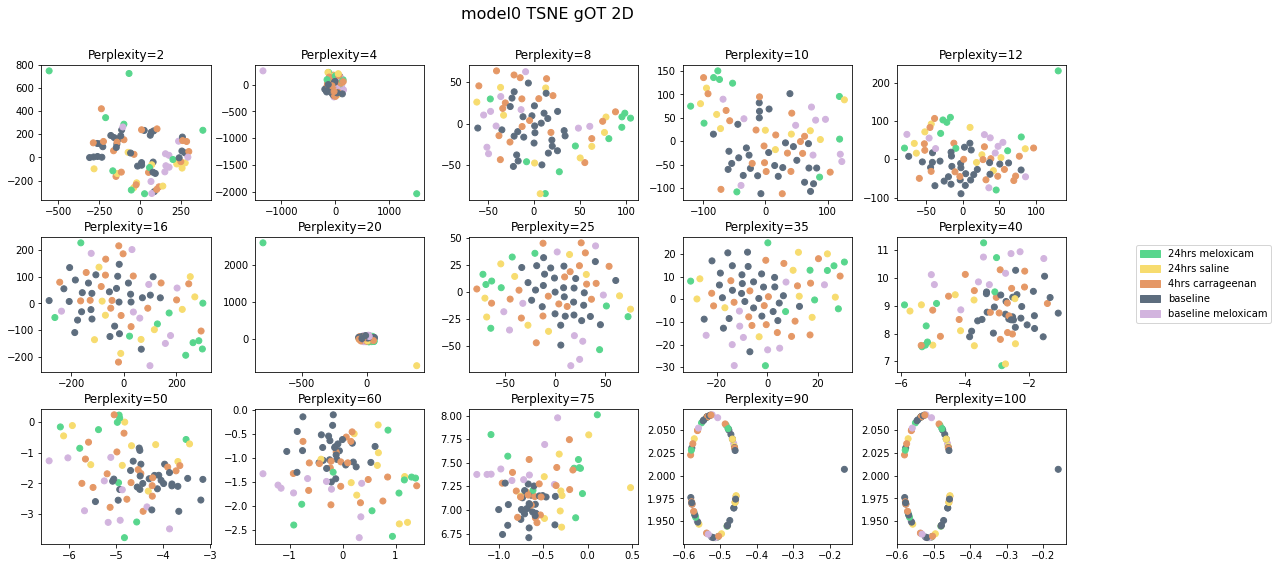

In [16]:
## Model 0
(fig, subplots) = plt.subplots(3,5, figsize = (15,8))
fig.tight_layout(h_pad=2)
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for ax, perplexity in zip(fig.axes,perplexities):
    x_vals, y_vals = reduce_dimensions(model0, perplexity)
    plot_with_matplotlib(x_vals, y_vals, labels, ax, perplexity)

title = fig.suptitle('model0 TSNE gOT 2D', size='16')
fig.subplots_adjust(top=0.88)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('model0_TSNE_gOT_2D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')

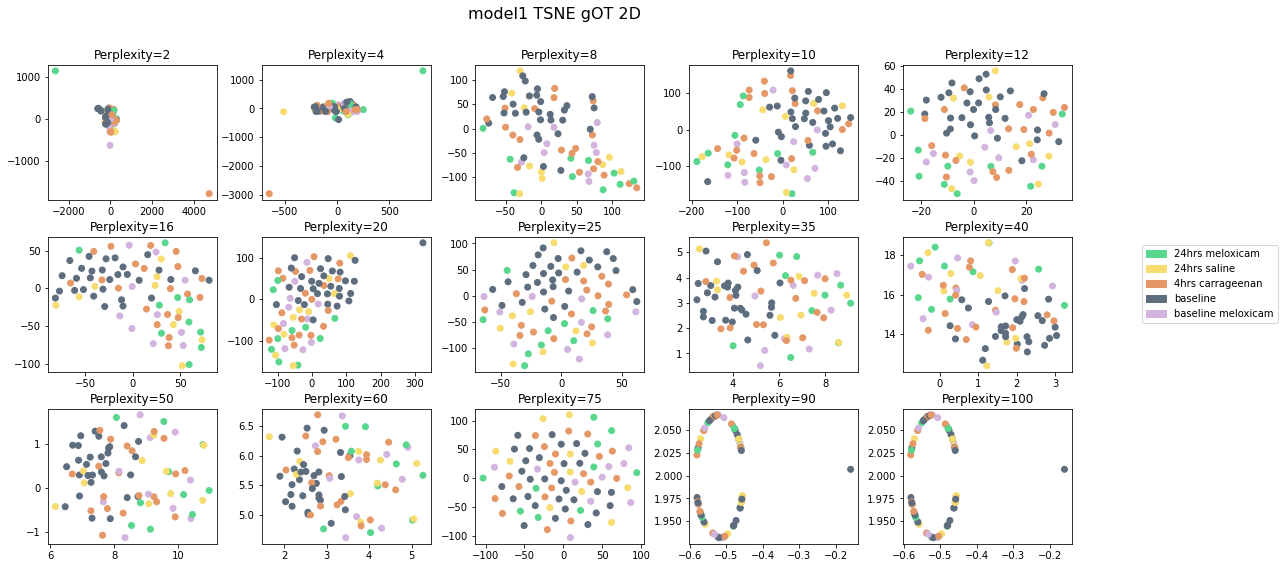

In [17]:
## Model 1
(fig, subplots) = plt.subplots(3,5, figsize = (15,8))
fig.tight_layout(h_pad=2)
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for ax, perplexity in zip(fig.axes,perplexities):
    x_vals, y_vals = reduce_dimensions(model1, perplexity)
    plot_with_matplotlib(x_vals, y_vals, labels, ax, perplexity)

title = fig.suptitle('model1 TSNE gOT 2D', size='16')
fig.subplots_adjust(top=0.88)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('model1_TSNE_gOT_2D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')

In [18]:
# ## Model 0
# fig = plt.figure(figsize=(40,24))
# perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
# len(perplexities)

# for i, perplexity in enumerate(perplexities):
#     ax = fig.add_subplot(3, 5, i+1, projection='3d')
#     x_vals, y_vals, z_vals = reduce_dimensions_3D(model0, perplexity)
#     plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, ax, perplexity)

In [19]:
# ## Model 1
# fig = plt.figure(figsize=(40,24))
# perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
# len(perplexities)

# for i, perplexity in enumerate(perplexities):
#     ax = fig.add_subplot(3, 5, i+1, projection='3d')
#     x_vals, y_vals, z_vals = reduce_dimensions_3D(model1, perplexity)
#     plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, ax, perplexity)

# gST

In [20]:
model0 = Doc2Vec.load('gST/doc2vec.0.model')
model1 = Doc2Vec.load('gST/doc2vec.1.model')

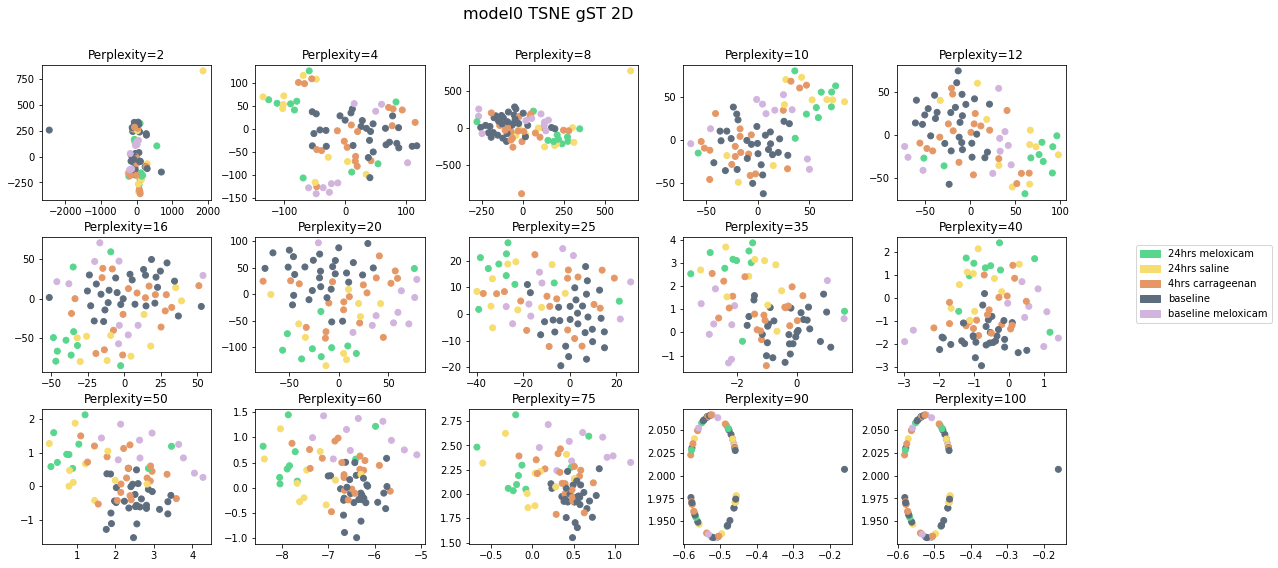

In [21]:
## Model 0
(fig, subplots) = plt.subplots(3,5, figsize = (15,8))
fig.tight_layout(h_pad=2)
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for ax, perplexity in zip(fig.axes,perplexities):
    x_vals, y_vals = reduce_dimensions(model0, perplexity)
    plot_with_matplotlib(x_vals, y_vals, labels, ax, perplexity)

title = fig.suptitle('model0 TSNE gST 2D', size='16')
fig.subplots_adjust(top=0.88)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('model0_TSNE_gST_2D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')

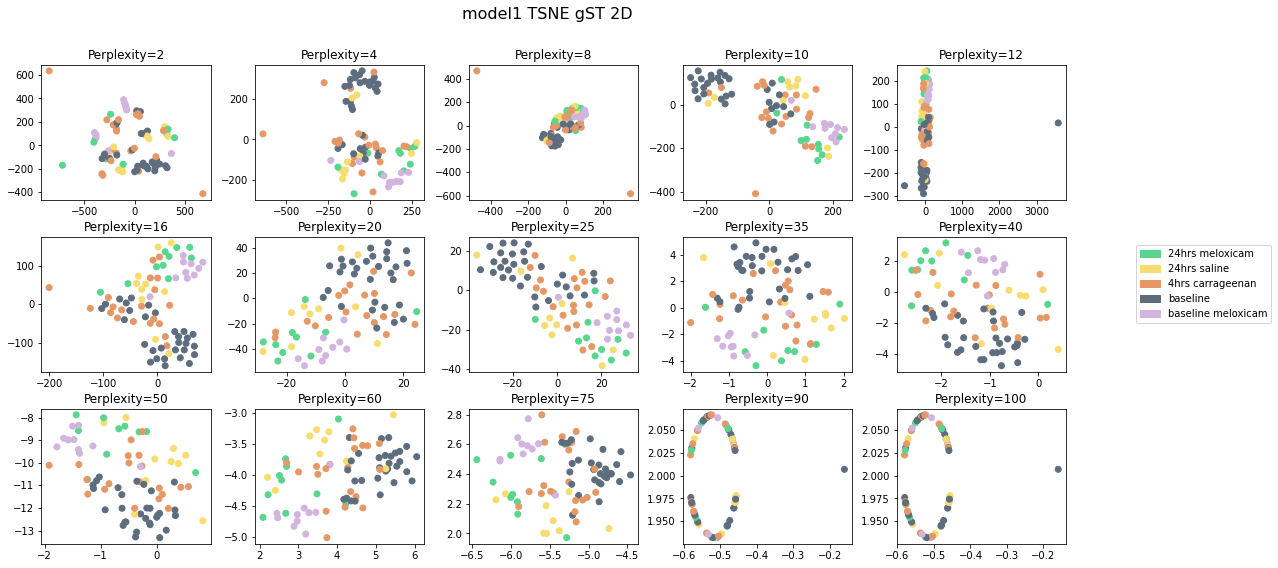

In [22]:
## Model 1
(fig, subplots) = plt.subplots(3,5, figsize = (15,8))
fig.tight_layout(h_pad=2)
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for ax, perplexity in zip(fig.axes,perplexities):
    x_vals, y_vals = reduce_dimensions(model1, perplexity)
    plot_with_matplotlib(x_vals, y_vals, labels, ax, perplexity)

title = fig.suptitle('model1 TSNE gST 2D', size='16')
fig.subplots_adjust(top=0.88)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('model1_TSNE_gST_2D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')

In [23]:
# ## Model 0
# fig = plt.figure(figsize=(40,24))
# perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
# len(perplexities)

# for i, perplexity in enumerate(perplexities):
#     ax = fig.add_subplot(3, 5, i+1, projection='3d')
#     x_vals, y_vals, z_vals = reduce_dimensions_3D(model0, perplexity)
#     plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, ax, perplexity)

In [24]:
# ## Model 1
# fig = plt.figure(figsize=(40,24))
# perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
# len(perplexities)

# for i, perplexity in enumerate(perplexities):
#     ax = fig.add_subplot(3, 5, i+1, projection='3d')
#     x_vals, y_vals, z_vals = reduce_dimensions_3D(model1, perplexity)
#     plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, ax, perplexity)

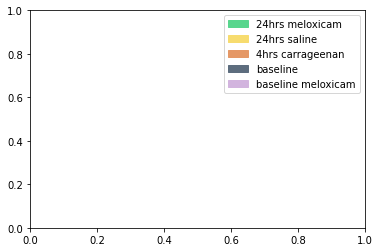

In [25]:
plt.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam])
plt.savefig('legend.png')